<a href="https://colab.research.google.com/github/samijaadar/MNIST_Handwritten_digits_classification_from_scratch/blob/main/MNIST_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv('/content/drive/MyDrive/digit-calssifier-train.csv')

In [3]:
data = np.array(data)
m , n = data.shape
np.random.shuffle(data) # shuffle before splitting into test and training sets
data.shape


(42000, 785)

In [4]:
train_data = data[1000:m].T
Y_train = train_data[0]
X_train = train_data[1:n]
X_train = X_train / 255.

train_data.shape

(785, 41000)

In [5]:
test_data = data[0:10000].T
Y_test = test_data[0]
X_test = test_data[1:n]
X_test = X_test / 255.

test_data.shape

(785, 10000)

In [29]:
#nitialize the weights and biases
def init_params():
  W1 = np.random.rand(16, 784) - 0.5
  b1 = np.random.rand(16, 1) - 0.5 

  W2 = np.random.rand(10, 16) - 0.5
  b2 = np.random.rand(10, 1) - 0.5

  return W1 , b1, W2, b2 

In [7]:
#defining ReLU (Rectified Linear Unit) activation function
def ReLU(X):
  return np.maximum(X, 0)

In [8]:
#defining Softmax activation function
def softmax(X):
  A = np.exp(X) / sum(np.exp(X))
  return A

In [9]:
def forward_propag(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)

  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)

  return Z1, A1, Z2, A2

In [10]:
#Encode number classes as a one-hot numeric array
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

In [11]:
#define the derivative of ReLU
def deriv_ReLU(Z):
  return Z > 0

In [12]:
def backward_propag(Z1, A1, Z2, A2, W2,X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 =  1/m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1)
  return dW1, db1, dW2, db2

In [13]:
def update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): 
  W1 = W1 - alpha * dW1
  W2 = W2 - alpha  * dW2
  b1 = b1 - alpha * db1
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

In [14]:
def get_predictions(A2): 
  return np.argmax(A2, 0)

In [15]:
def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

In [16]:
def grad_desc(X, Y, iteration, alpha):
  W1, b1, W2, b2 = init_params()
  for i in range(iteration):
    Z1, A1, Z2, A2 = forward_propag(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_propag(Z1, A1, Z2, A2, W2, X, Y)
    W1, b1, W2, b2 = update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if ( i % 50 == 0):
      print("Iteration: ", i)
      predictions = get_predictions(A2)
      print(get_accuracy(predictions, Y))
  return W1, b1, W2, b2

In [30]:
W1, b1, W2, b2 = grad_desc(X_train , Y_train , 600, 0.1)

Iteration:  0
0.10051219512195123
Iteration:  50
0.459
Iteration:  100
0.6654146341463415
Iteration:  150
0.7348780487804878
Iteration:  200
0.7743414634146342
Iteration:  250
0.7988536585365854
Iteration:  300
0.8170975609756097
Iteration:  350
0.8322682926829268
Iteration:  400
0.8452195121951219
Iteration:  450
0.8550975609756097
Iteration:  500
0.8622682926829268
Iteration:  550
0.8679512195121951


In [23]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propag(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


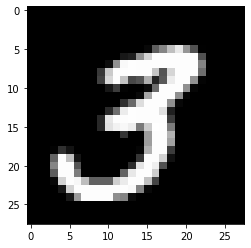

In [31]:
#test prediction on training set
test_prediction(8 , W1, b1, W2, b2)

In [32]:
#test prediction on test set
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

0.8756